In [12]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrame


# Set the coin_id column as index


# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    km = KMeans(n_clusters=i, random_state=00)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

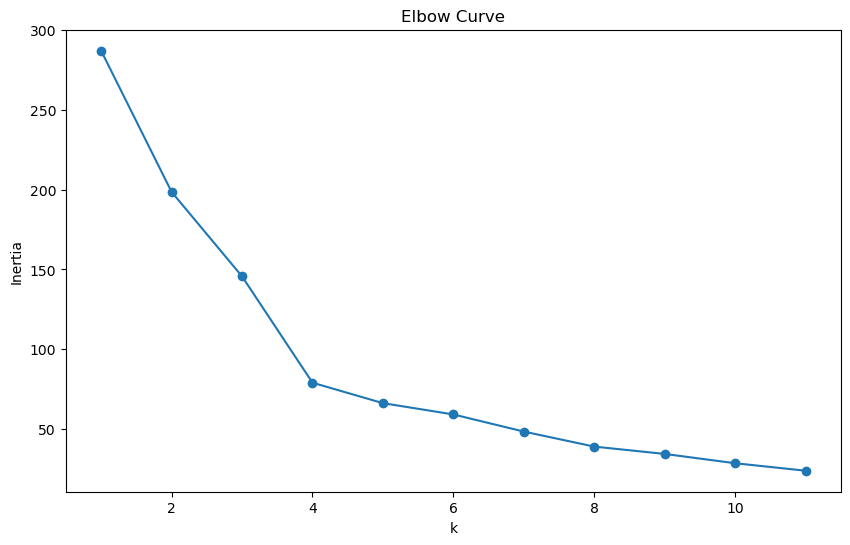

In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], "o-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [15]:
# Initialize the K-Means model using the best value for k
km = KMeans(n_clusters=3, random_state=0)

In [17]:
# Fit the K-Means model using the scaled DataFrame
km.fit(scaled_df)

c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = km.predict(scaled_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [22]:
# Create a copy of the scaled DataFrame
clustered_df = scaled_df.copy()

In [23]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_df["Cluster"] = predictions.astype(int)

# Display the copy of the scaled DataFrame
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [25]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
cluster_plot = clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters"
)

cluster_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [27]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [29]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

print("\nExplained Variance Ratio by Component:")
for i, variance in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {variance:.4f}")
print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")



Explained Variance Ratio by Component:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760

Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [32]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pca_data,
    columns=["PC 1", "PC 2", "PC 3"],
    index=scaled_df.index
)

# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index


# Display the scaled PCA DataFrame
pca_df.head()

,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [34]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_df)
    inertia_pca.append(km.inertia_)


c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_values,
    "inertia": inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


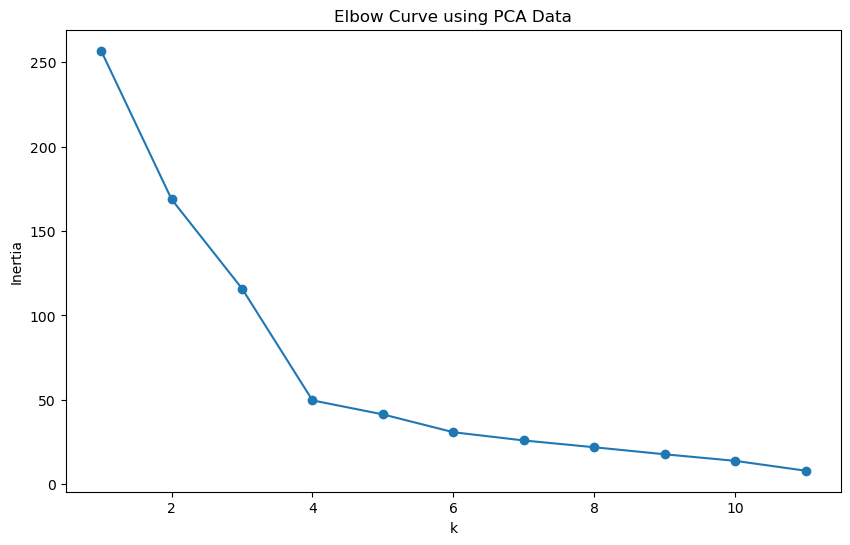

In [36]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], "o-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve using PCA Data")
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes but only slightly

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [37]:
# Initialize the K-Means model using the best value for k
km_pca = KMeans(n_clusters=4, random_state=0)

In [38]:
# Fit the K-Means model using the PCA data
km_pca.fit(pca_df)

c:\Users\ricsa\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions_pca = km_pca.predict(pca_df)

# Print the resulting array of cluster values.
predictions_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [40]:
# Create a copy of the scaled PCA DataFrame
clustered_pca_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = predictions_pca.astype(int)

# Display the copy of the scaled PCA DataFrame
clustered_pca_df.head()

,PC 1,PC 2,PC 3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [42]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
cluster_plot_pca = clustered_pca_df.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters using PCA Data"
)
cluster_plot_pca

:NdOverlay   [Cluster]
   :Scatter   [PC 1]   (PC 2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [47]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

# Create DataFrames for both elbow curves
elbow_comparison = pd.DataFrame({
    'k': k_values,
    'Original Data Inertia': inertia,
    'PCA Data Inertia': inertia_pca
})

# Create single elbow curve plot with both curves
elbow_comparison_plot = elbow_comparison.hvplot(
    x='k',
    y=['Original Data Inertia', 'PCA Data Inertia'],
    title='Elbow Curve Comparison',
    height=400,
    width=500,
    legend='right'
)

# Original Data Clusters
original_clusters_plot = clustered_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    title='Original Data Clusters',
    height=400,
    width=500,
    hover_cols=['coin_id']
)

# PCA Clusters
pca_clusters_plot = clustered_pca_df.hvplot.scatter(
    x='PC 1',
    y='PC 2',
    by='Cluster',
    title='PCA Data Clusters',
    height=400,
    width=500,
    hover_cols=['coin_id']
)

# Combine cluster plots side by side
cluster_comparison_plot = original_clusters_plot + pca_clusters_plot

# Display both composite plots
print("Elbow Curve Comparison:")
elbow_comparison_plot

print("\nCluster Comparison:")
cluster_comparison_plot

# Create static versions using matplotlib for saving
plt.figure(figsize=(15, 5))

# Elbow Curves
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-', label='Original Data')
plt.plot(k_values, inertia_pca, 'ro-', label='PCA Data')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.legend()
plt.grid(True)

# Clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(clustered_df['price_change_percentage_24h'], 
                     clustered_df['price_change_percentage_7d'],
                     c=clustered_df['Cluster'], 
                     cmap='viridis')
plt.xlabel('Price Change 24h')
plt.ylabel('Price Change 7d')
plt.title('Original Data Clusters')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.savefig('clustering_comparison.png')
plt.close()

# Print analysis summary
print("\nClustering Analysis Summary:")
print("-" * 50)
print(f"Number of clusters (Original): {len(clustered_df['Cluster'].unique())}")
print(f"Number of clusters (PCA): {len(clustered_pca_df['Cluster'].unique())}")
print("\nCluster sizes (Original):")
print(clustered_df['Cluster'].value_counts().sort_index())
print("\nCluster sizes (PCA):")
print(clustered_pca_df['Cluster'].value_counts().sort_index())

Elbow Curve Comparison:

Cluster Comparison:

Clustering Analysis Summary:
--------------------------------------------------
Number of clusters (Original): 3
Number of clusters (PCA): 4

Cluster sizes (Original):
Cluster
0    28
1     1
2    12
Name: count, dtype: int64

Cluster sizes (PCA):
Cluster
0    26
1     1
2    13
3     1
Name: count, dtype: int64


In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The data will usually be less likely to have outliers when using fewer features.